### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# The simpleImputer helps to handle missing data
# See usage and parameters passed in one of the cells below

In [2]:
# Read the data
train_data = pd.read_csv('../files/train.csv')
test_data = pd.read_csv('../files/test.csv')

In [3]:
#seperate the target variable
train_data_y = train_data['SalePrice']

#exclude Id columns from train(and the saleprice column) and test(didn't come with the saleprice by default) data
train_data = train_data.drop(['Id', 'SalePrice'], axis = 1)
test_data = test_data.drop(['Id'], axis = 1)
# This line of code removes the rows with null values, the subset method specifies where to look for NULL values

In [4]:
#due to the fact that train and test data do not have the same amount of columns we will train the models with the intersection of their columns
common_columns = train_data.columns.intersection(test_data.columns)
train_data = train_data[common_columns]
test_data = test_data[common_columns]

In [5]:
#create a dataframe named as train_data_numeric from train data and fill the missing values with the mean from each columns using the Imputer class
train_data_numeric = train_data.select_dtypes(exclude=['object'])
# the .select_dtypes(exclude=['object']) selects all column types excluding ones with object data types.
train_data_numeric_columns = train_data_numeric.columns #get the column names 

In [6]:
# missing_values : The missing_values placeholder which has to be imputed. By default is NaN 
# strategy : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent(for mode)’ and ‘constant’. 
# The strategy should be choosen based on the column(s) data type. For example X dataframe has integers as column datatypes hence I use the mean to impute
# If I have onehot coded values of say 0,1,2 alternating values, I will use say the mode.
# fill_value : The constant value to be given to the NaN data using the constant strategy.
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_data_numeric = my_imputer.fit_transform(train_data_numeric)
# convert to a df
train_data_numeric = pd.DataFrame(train_data_numeric, columns = train_data_numeric_columns)

In [7]:
train_data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [8]:
#a function to find the difference between two dataframes
# We will use this function to check for columns in the main train dataframe that are not in the numeric train dataframe
# Then we will save the columns in a new df
def df_diff(first, second): # It accepts two dataframes as parameters
        second = set(second)
        return [item for item in first if item not in second]

#### Handling the categorical data

In [9]:
#train_data non numeric columns into one hot encoding
train_data_non_numeric = train_data[df_diff(train_data.columns, train_data_numeric.columns)]
# using pd.get_dummies to convert the categorical data to numeric 0s and 1s
train_data_non_numeric = pd.get_dummies(train_data_non_numeric)

#concat the numeric and non_numeric dataframes into one
train_data_preprocessed = pd.concat([train_data_numeric.reset_index(drop=True), train_data_non_numeric], axis=1)

#### Cleaning Test Data Too

In [10]:
#do the exact same thing with test data
test_data_numeric = test_data.select_dtypes(exclude=['object'])
test_data_numeric_columns = test_data_numeric.columns
test_data_numeric = my_imputer.fit_transform(test_data_numeric)
test_data_numeric = pd.DataFrame(test_data_numeric, columns = test_data_numeric_columns)

In [11]:
#test_data non numeric columns into one hot encoding process
test_data_non_numeric = test_data[df_diff(test_data.columns, test_data_numeric.columns)]
test_data_non_numeric = pd.get_dummies(test_data_non_numeric)

#concat the numeric and non_numeric dataframes into one
test_data_preprocessed = pd.concat([test_data_numeric.reset_index(drop=True), test_data_non_numeric], axis=1)

In [12]:
#get again the common columns between train and test data
common_columns = test_data_preprocessed.columns.intersection(train_data_preprocessed.columns)
test_data_preprocessed = test_data_preprocessed[common_columns]
train_data_preprocessed = train_data_preprocessed[common_columns]

In [13]:
test_data_preprocessed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Background on model used

### What is XGBoost
XGBoost is the leading model for working with standard tabular data (the type of data you store in Pandas DataFrames, as opposed to more exotic types of data like images and videos). XGBoost models dominate many Kaggle competitions.

To reach peak accuracy, XGBoost models require more knowledge and model tuning than techniques like Random Forest. After this tutorial, you'ill be able to

. Follow the full modeling workflow with XGBoost
. Fine-tune XGBoost models for optimal performance

XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm (scikit-learn has another version of this algorithm, but XGBoost has some technical advantages.) What is Gradient Boosted Decision Trees? We'll walk through a diagram.
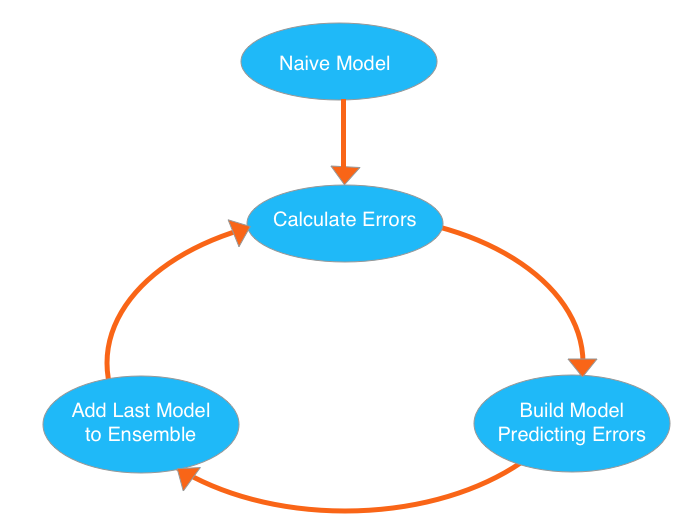

Building and fitting model using xgboost

In [14]:
from xgboost import XGBRegressor

In [15]:
model = XGBRegressor()

In [16]:
model.fit(train_data_preprocessed, train_data_y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Predictions

In [17]:
predictions = model.predict(test_data_preprocessed)

In [18]:
predictions

array([126308.28, 150446.56, 191197.34, ..., 176536.27, 113884.21,
       220153.95], dtype=float32)

In [19]:
test_data = pd.read_csv('../files/test.csv') #Since I dropped the Id column from the test data earlier, I have to reload the file
# to get access to this column again
my_submission = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predictions})

# you could use any filename. We choose submission here
my_submission.to_csv('../files/Olawale_submission_XGBoost.csv', index=False)

In [20]:
my_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


### Model Tuning

XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed. The first parameters you should understand are:

#### n_estimators and early_stopping_rounds

n_estimators specifies how many times to go through the modeling cycle described above.

In the underfitting vs overfitting graph, n_estimators moves you further to the right. Too low a value causes underfitting, which is inaccurate predictions on both training data and new data. Too large a value causes overfitting, which is accurate predictions on training data, but inaccurate predictions on new data (which is what we care about). You can experiment with your dataset to find the ideal. Typical values range from 100-1000, though this depends a lot on the learning rate discussed below.

The argument early_stopping_rounds offers a way to automatically find the ideal value. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. early_stopping_rounds = 5 is a reasonable value. Thus we stop after 5 straight rounds of deteriorating validation scores.

When using early_stopping_rounds, you need to set aside some of your data for checking the number of rounds to use. If you later want to fit a model with all of your data, set n_estimators to whatever value you found to be optimal when run with early stopping.

#### learning_rate
Here's a subtle but important trick for better XGBoost models:

Instead of getting predictions by simply adding up the predictions from each component model, we will multiply the predictions from each model by a small number before adding them in. This means each tree we add to the ensemble helps us less. In practice, this reduces the model's propensity to overfit.

So, you can use a higher value of n_estimators without overfitting. If you use early stopping, the appropriate number of trees will be set automatically.

In general, a small learning rate (and large number of estimators) will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.

#### n_jobs

On larger datasets where runtime is a consideration, you can use parallelism to build your models faster. It's common to set the parameter n_jobs equal to the number of cores on your machine. On smaller datasets, this won't help.

The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the fit command.

XGBoost has a multitude of other parameters, but these will go a very long way in helping you fine-tune your XGBoost model for optimal performance.

In [21]:
'''
Experimenting with a smaller Grid Search and make new predictions with the best parameters
this grid search it will take time to finish, approximately it will take 1-2 days depending on 
the cpu power.
'''

parameters = {'max_depth':[2, 3, 4], 'learning_rate':[0.3, 0.25, 0.2], 'n_estimators':[200, 300, 400], 
              'min_child_weight':[i for i in range(1,8)], 'gamma': [i/10.0 for i in range(0,2)], 
              'subsample':[i/10.0 for i in range(2,8)], 
              'colsample_bytree':[i/10.0 for i in range(2,8)], 'reg_alpha':[1e-5, 1e-4, 1e-3]}

from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor

my_model = XGBRegressor(seed=123)
clf = GridSearchCV(my_model, parameters, cv=4, scoring='r2', verbose = 0, n_jobs=2)
clf.fit(train_data_preprocessed, train_data_y)
print("best parameters after tuning:", clf.best_params_)

best parameters after tuning: {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 200, 'reg_alpha': 0.001, 'subsample': 0.7}


### Printing the best score

In [23]:
print(clf.best_score_)

0.8966547052995301


### Lets make predictions with the best tuned model

In [24]:
predictions_prices = clf.predict(test_data_preprocessed)

test_data = pd.read_csv('../files/test.csv')
my_submission_grid = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predictions_prices})

# you could use any filename. We choose submission here
my_submission_grid.to_csv('../files/xgboost_submission_after_fine_tuned_grid.csv', index=False)

In [25]:
final_submission = pd.read_csv('../files/xgboost_submission_after_fine_tuned_grid.csv')
final_submission.head()

,Id,SalePrice
0,1461,130362.57
1,1462,157600.39
2,1463,186835.61
3,1464,204548.39
4,1465,166154.94


### Save the fine tuned xgboost model to disk for future references

In [27]:
#save the model
import joblib

joblib.dump(clf.best_estimator_, 'saved_model_fine_tune_xgboost.pkl')

['saved_model_fine_tune_xgboost.pkl']